In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

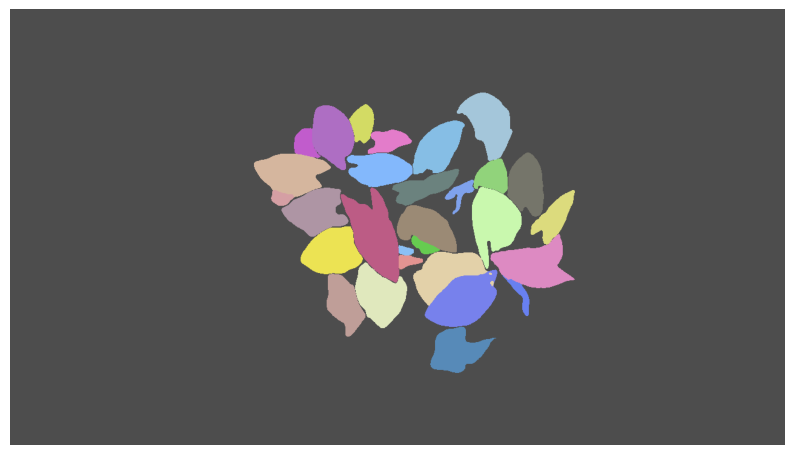

In [8]:

# Load the mask file
mask = np.load('rgb_000001_mask.npy')  # Shape (29, 1, 720, 1280)

# Reshape the mask to remove the extra dimension
mask = mask.reshape((29, 720, 1280))

# Combine all masks into a single mask
combined_mask = np.zeros((720, 1280), dtype=np.int32)

# Assign unique labels to each mask
for i in range(mask.shape[0]):
    combined_mask[mask[i] > 0] = i + 1  # Assign unique labels starting from 1

# Create a colored version of the combined mask
colored_mask = np.zeros((*combined_mask.shape, 3), dtype=np.uint8)
unique_labels = np.unique(combined_mask)

# Assign random colors to each unique label in the combined mask
np.random.seed(0)  # For reproducibility
colors = np.random.randint(0, 255, size=(len(unique_labels), 3), dtype=np.uint8)

for label, color in zip(unique_labels, colors):
    if label == 0:
        continue  # Skip the background
    colored_mask[combined_mask == label] = color

# Create a blank white background image
white_background = np.ones((*combined_mask.shape, 3), dtype=np.uint8) * 255

# Plot the results
plt.figure(figsize=(10, 10))
plt.imshow(white_background)
plt.imshow(colored_mask, alpha=0.7)
plt.axis('off')
plt.show()


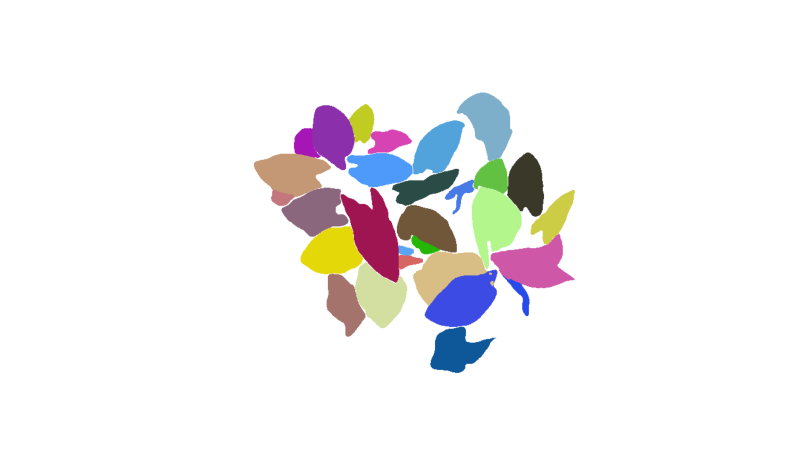

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the mask file
mask = np.load('rgb_000001_mask.npy')  # Shape (29, 1, 720, 1280)

# Reshape the mask to remove the extra dimension
mask = mask.reshape((29, 720, 1280))

# Combine all masks into a single mask
combined_mask = np.zeros((720, 1280), dtype=np.int32)

# Assign unique labels to each mask
for i in range(mask.shape[0]):
    combined_mask[mask[i] > 0] = i + 1  # Assign unique labels starting from 1

# Create a colored version of the combined mask
colored_mask = np.zeros((*combined_mask.shape, 3), dtype=np.uint8)
unique_labels = np.unique(combined_mask)

# Assign random colors to each unique label in the combined mask
np.random.seed(0)  # For reproducibility
colors = np.random.randint(0, 255, size=(len(unique_labels), 3), dtype=np.uint8)

for label, color in zip(unique_labels, colors):
    if label == 0:
        continue  # Skip the background
    colored_mask[combined_mask == label] = color

# Create a blank white background image
white_background = np.ones((*combined_mask.shape, 3), dtype=np.uint8) * 255

# Combine the white background and the colored mask
final_image = white_background.copy()
mask_indices = np.where(combined_mask > 0)
final_image[mask_indices[0], mask_indices[1]] = colored_mask[mask_indices[0], mask_indices[1]]

# Plot the results
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()


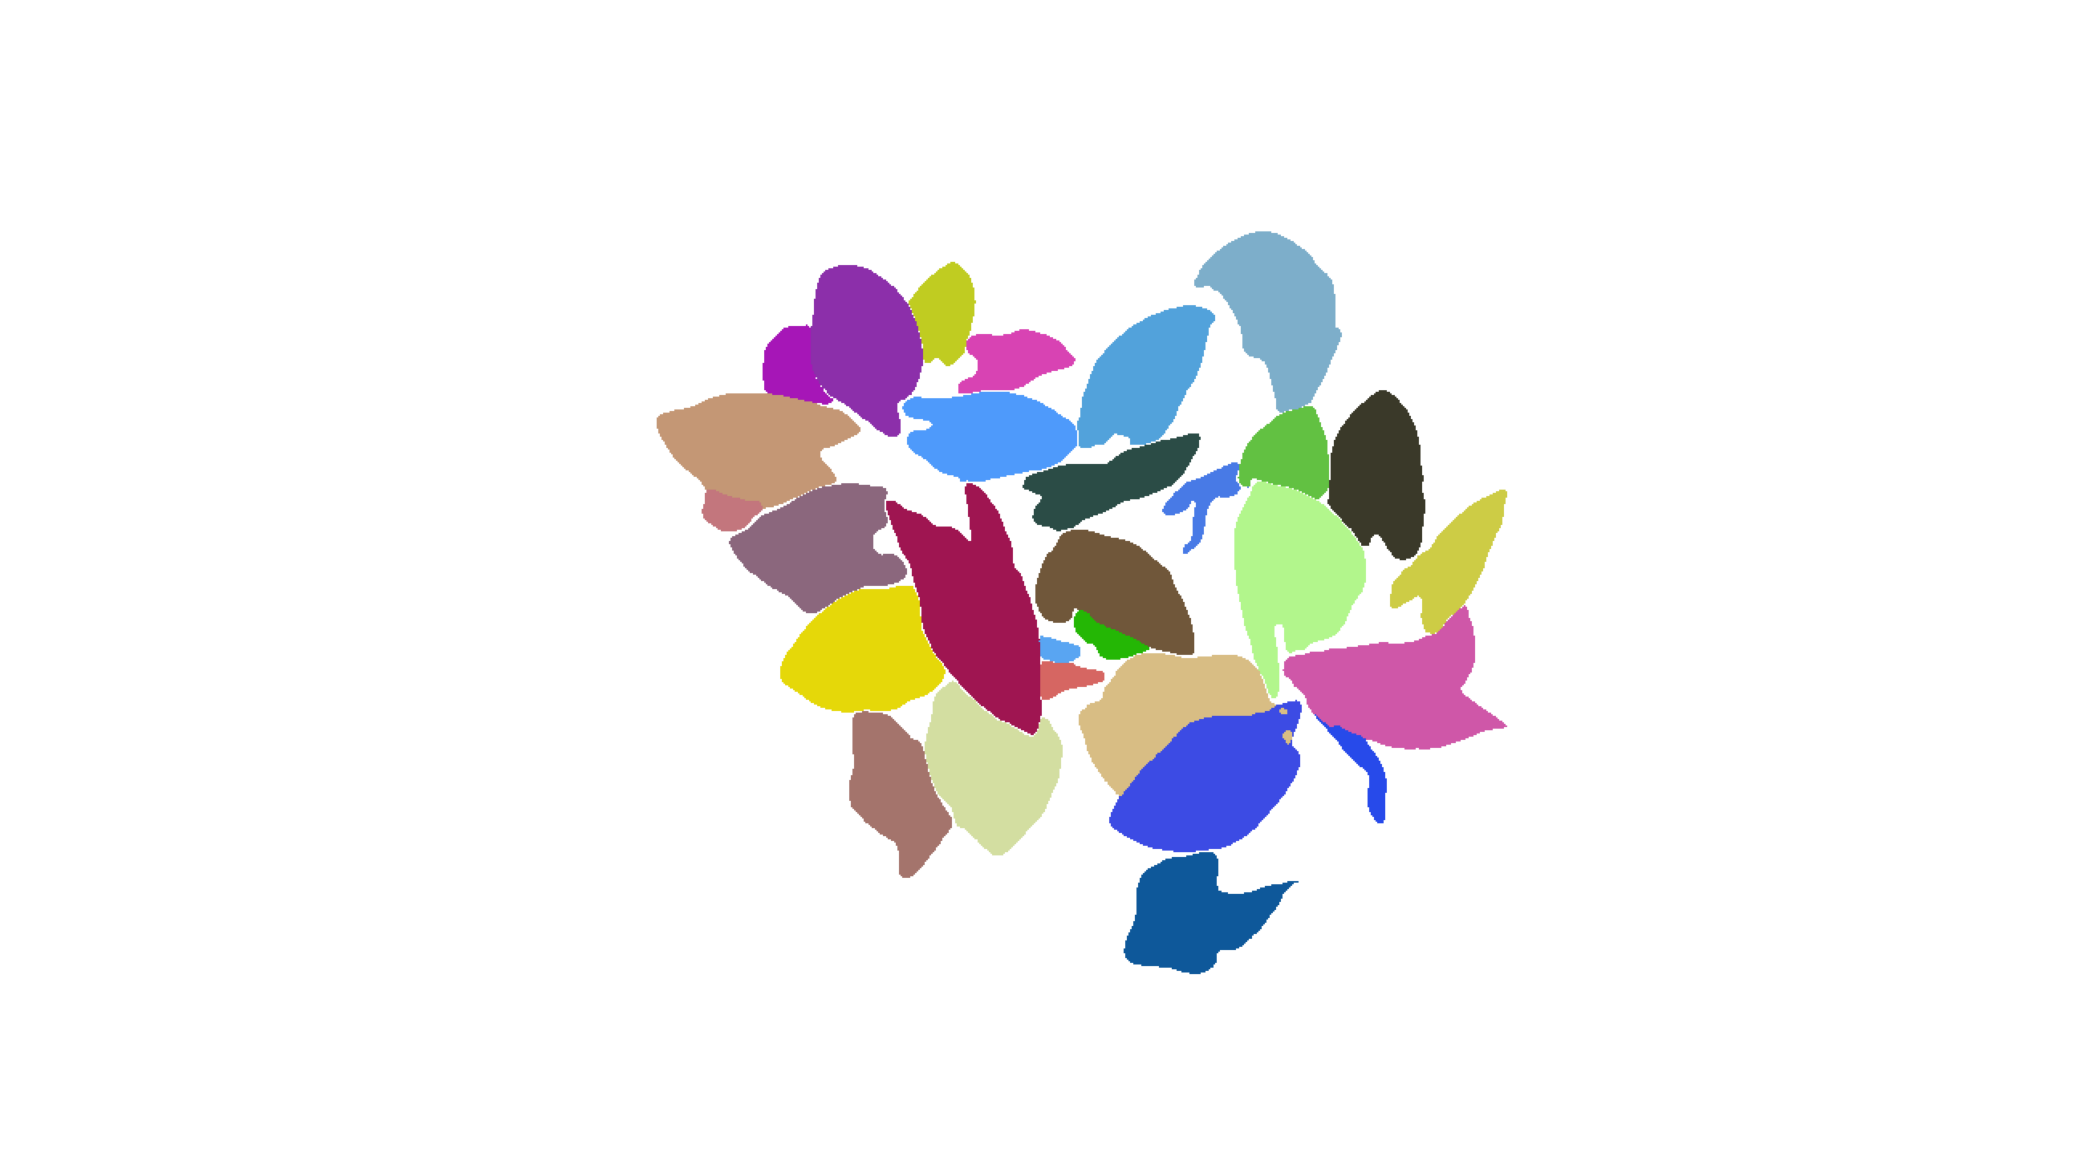

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the mask file
mask = np.load('rgb_000001_mask.npy')  # Shape (29, 1, 720, 1280)

# Load the plant image to get the dimensions
plant_image = Image.open('rgb_000001.png')
width, height = plant_image.size

# Reshape the mask to remove the extra dimension
mask = mask.reshape((29, 720, 1280))

# Combine all masks into a single mask
combined_mask = np.zeros((720, 1280), dtype=np.int32)

# Assign unique labels to each mask
for i in range(mask.shape[0]):
    combined_mask[mask[i] > 0] = i + 1  # Assign unique labels starting from 1

# Create a colored version of the combined mask
colored_mask = np.zeros((*combined_mask.shape, 3), dtype=np.uint8)
unique_labels = np.unique(combined_mask)

# Assign random colors to each unique label in the combined mask
np.random.seed(0)  # For reproducibility
colors = np.random.randint(0, 255, size=(len(unique_labels), 3), dtype=np.uint8)

for label, color in zip(unique_labels, colors):
    if label == 0:
        continue  # Skip the background
    colored_mask[combined_mask == label] = color

# Create a blank white background image
white_background = np.ones((*combined_mask.shape, 3), dtype=np.uint8) * 255

# Combine the white background and the colored mask
final_image = white_background.copy()
mask_indices = np.where(combined_mask > 0)
final_image[mask_indices[0], mask_indices[1]] = colored_mask[mask_indices[0], mask_indices[1]]

# Calculate aspect ratio and adjust figure size
aspect_ratio = width / height
figsize = (15 * aspect_ratio, 15)  # Increase size while maintaining aspect ratio

# Plot the results
plt.figure(figsize=figsize)
plt.imshow(final_image)
plt.axis('off')
plt.show()
